In [12]:
import streamlit as st
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
%matplotlib inline

In [13]:
df = pd.read_csv("./../data/_data.csv")
df.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [14]:
print(*df.columns, sep="\n")
print(df.shape)

Unnamed: 0
ID  объявления
Количество комнат
Тип
Метро
Адрес
Площадь, м2
Дом
Парковка
Цена
Телефоны
Описание
Ремонт
Площадь комнат, м2
Балкон
Окна
Санузел
Можно с детьми/животными
Дополнительно
Название ЖК
Серия дома
Высота потолков, м
Лифт
Мусоропровод
Ссылка на объявление
(23368, 25)


In [15]:
df.groupby("Тип").count()

,Unnamed: 0,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
Тип,,,,,,,,,,,,,,,,,,,,,
Квартира,23368,23368,22327,22053,23368,23368,23368,9951,23368,23368,...,16755,20696,17272,23011,5848,2163,11206,17868,12846,23368


In [16]:
df.groupby("Парковка").count()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
Парковка,,,,,,,,,,,,,,,,,,,,,
многоуровневая,118,118,108,118,110,118,118,118,118,118,...,104,113,89,117,78,1,72,102,64,118
на крыше,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,1,0,1
наземная,6043,6043,5793,6043,5746,6043,6043,6043,6043,6043,...,5054,5653,4840,6020,967,509,3771,4992,4240,6043
открытая,1017,1017,948,1017,1002,1017,1017,1017,1017,1017,...,797,1006,702,1016,185,9,240,649,216,1017
подземная,2772,2772,2633,2772,2736,2772,2772,2772,2772,2772,...,2208,2586,2127,2757,2023,543,1524,2411,1047,2772


In [98]:
metro = df.iloc[::, [1, 4]].copy()

metro_stations = {
    # Сокольническая линия (1)
    "Бульвар Рокоссовского": "ВАО",
    "Черкизовская": "ВАО",
    "Преображенская площадь": "ВАО",
    "Сокольники": "ВАО",
    "Красносельская": "ЦАО",
    "Комсомольская": "ЦАО",
    "Красные Ворота": "ЦАО",
    "Чистые пруды": "ЦАО",
    "Лубянка": "ЦАО",
    "Охотный Ряд": "ЦАО",
    "Библиотека им. Ленина": "ЦАО",
    "Кропоткинская": "ЦАО",
    "Парк культуры (Сокольническая)": "ЦАО",
    "Фрунзенская": "ЦАО",
    "Спортивная": "ЗАО",
    "Воробьёвы горы": "ЗАО",
    "Университет": "ЗАО",
    "Проспект Вернадского": "ЗАО",
    "Юго-Западная": "ЗАО",
    "Тропарёво": "ЗАО",
    "Румянцево": "ТиНАО",
    "Саларьево": "ТиНАО",
    "Филатов Луг": "ТиНАО",
    "Прокшино": "ТиНАО",
    "Ольховая": "ТиНАО",
    "Коммунарка": "ТиНАО",
    # Замоскворецкая линия (2)
    "Ховрино": "САО",
    "Беломорская": "САО",
    "Речной вокзал": "САО",
    "Водный стадион": "САО",
    "Войковская": "САО",
    "Сокол": "САО",
    "Аэропорт": "САО",
    "Динамо": "САО",
    "Белорусская": "ЦАО",
    "Маяковская": "ЦАО",
    "Тверская": "ЦАО",
    "Театральная": "ЦАО",
    "Новокузнецкая": "ЦАО",
    "Павелецкая": "ЦАО",
    "Автозаводская": "ЮАО",
    "Технопарк": "ЮАО",
    "Коломенская": "ЮАО",
    "Каширская": "ЮАО",
    "Кантемировская": "ЮАО",
    "Царицыно": "ЮАО",
    "Орехово": "ЮАО",
    "Домодедовская": "ЮАО",
    "Красногвардейская": "ЮАО",
    "Алма-Атинская": "ЮАО",
    # Арбатско-Покровская линия (3)
    "Пятницкое шоссе": "СЗАО",
    "Митино": "СЗАО",
    "Волоколамская": "СЗАО",
    "Мякинино": "МО (Красногорск)",
    "Строгино": "СЗАО",
    "Крылатское": "ЗАО",
    "Молодёжная": "ЗАО",
    "Кунцевская": "ЗАО",
    "Славянский бульвар": "ЗАО",
    "Парк Победы": "ЗАО",
    "Киевская": "ЗАО",
    "Смоленская": "ЦАО",
    "Арбатская": "ЦАО",
    "Площадь Революции": "ЦАО",
    "Курская": "ЦАО",
    "Бауманская": "ЦАО",
    "Электрозаводская": "ВАО",
    "Семёновская": "ВАО",
    "Партизанская": "ВАО",
    "Измайловская": "ВАО",
    "Первомайская": "ВАО",
    "Щелковская": "ВАО",
    # Филёвская линия (4)
    "Кунцевская": "ЗАО",
    "Пионерская": "ЗАО",
    "Филёвский парк": "ЗАО",
    "Багратионовская": "ЗАО",
    "Фили": "ЗАО",
    "Кутузовская": "ЗАО",
    "Студенческая": "ЗАО",
    "Киевская": "ЦАО",
    "Смоленская": "ЦАО",
    "Александровский сад": "ЦАО",
    "Арбатская (Филёвская)": "ЦАО",
    "Выставочная": "ЦАО",
    "Международная": "ЦАО",
    # Кольцевая линия (5)
    "Парк культуры": "ЦАО",
    "Киевская": "ЦАО",
    "Краснопресненская": "ЦАО",
    "Белорусская": "ЦАО",
    "Новослободская": "ЦАО",
    "Проспект Мира": "ЦАО",
    "Комсомольская": "ЦАО",
    "Курская": "ЦАО",
    "Таганская": "ЦАО",
    "Павелецкая": "ЦАО",
    "Добрынинская": "ЦАО",
    "Октябрьская": "ЦАО",
    # Калужско-Рижская линия (6)
    "Медведково": "СВАО",
    "Бабушкинская": "СВАО",
    "Свиблово": "СВАО",
    "Ботанический сад": "СВАО",
    "ВДНХ": "СВАО",
    "Алексеевская": "СВАО",
    "Рижская": "СВАО",
    "Проспект Мира": "ЦАО",
    "Сухаревская": "ЦАО",
    "Тургеневская": "ЦАО",
    "Китай-город": "ЦАО",
    "Третьяковская": "ЦАО",
    "Октябрьская": "ЦАО",
    "Шаболовская": "ЦАО",
    "Ленинский проспект": "ЮЗАО",
    "Академическая": "ЮЗАО",
    "Профсоюзная": "ЮЗАО",
    "Новые Черёмушки": "ЮЗАО",
    "Калужская": "ЮЗАО",
    "Беляево": "ЮЗАО",
    "Коньково": "ЮЗАО",
    "Тёплый Стан": "ЮЗАО",
    "Ясенево": "ЮЗАО",
    "Новоясеневская": "ЮЗАО",
    # Таганско-Краснопресненская линия (7)
    "Котельники": "МО (Люберцы)",
    "Жулебино": "ЮВАО",
    "Лермонтовский проспект": "ЮВАО",
    "Выхино": "ЮВАО",
    "Рязанский проспект": "ЮВАО",
    "Кузьминки": "ЮВАО",
    "Текстильщики": "ЮВАО",
    "Волгоградский проспект": "ЮВАО",
    "Пролетарская": "ЮВАО",
    "Таганская": "ЦАО",
    "Китай-город": "ЦАО",
    "Кузнецкий мост": "ЦАО",
    "Пушкинская": "ЦАО",
    "Баррикадная": "ЦАО",
    "Улица 1905 года": "ЦАО",
    "Беговая": "ЦАО",
    "Полежаевская": "САО",
    "Октябрьское Поле": "СЗАО",
    "Щукинская": "СЗАО",
    "Спартак": "СЗАО",
    "Тушинская": "СЗАО",
    "Сходненская": "СЗАО",
    "Планерная": "СЗАО",
    # Калининская линия (8)
    "Новокосино": "ВАО",
    "Новогиреево": "ВАО",
    "Перово": "ВАО",
    "Шоссе Энтузиастов": "ВАО",
    "Авиамоторная": "ВАО",
    "Площадь Ильича": "ЦАО",
    "Марксистская": "ЦАО",
    "Третьяковская": "ЦАО",
    # Солнцевская линия (8А и 8Б)
    "Рассказовка": "ТиНАО",
    "Новопеределкино": "ЗАО",
    "Боровское шоссе": "ЗАО",
    "Солнцево": "ЗАО",
    "Говорово": "ЗАО",
    "Озёрная": "ЗАО",
    "Мичуринский проспект": "ЗАО",
    "Раменки": "ЗАО",
    "Ломоносовский проспект": "ЗАО",
    "Минская": "ЗАО",
    "Парк Победы": "ЗАО",
    "Деловой центр": "ЦАО",
    # Серпуховско-Тимирязевская линия (9)
    "Алтуфьево": "СВАО",
    "Бибирево": "СВАО",
    "Отрадное": "СВАО",
    "Владыкино": "СВАО",
    "Петровско-Разумовская": "СВАО",
    "Тимирязевская": "САО",
    "Дмитровская": "САО",
    "Савёловская": "САО",
    "Менделеевская": "ЦАО",
    "Цветной бульвар": "ЦАО",
    "Чеховская": "ЦАО",
    "Боровицкая": "ЦАО",
    "Полянка": "ЦАО",
    "Серпуховская": "ЦАО",
    "Тульская": "ЮАО",
    "Нагатинская": "ЮАО",
    "Нагорная": "ЮАО",
    "Нахимовский проспект": "ЮАО",
    "Севастопольская": "ЮАО",
    "Чертановская": "ЮАО",
    "Южная": "ЮАО",
    "Пражская": "ЮАО",
    "Улица Академика Янгеля": "ЮАО",
    "Аннино": "ЮАО",
    "Бульвар Дмитрия Донского": "ЮАО",
    # Люблинско-Дмитровская линия (10)
    "Физтех": "МО (Долгопрудный)",
    "Лианозово": "СВАО",
    "Яхромская": "СВАО",
    "Селигерская": "СВАО",
    "Верхние Лихоборы": "СВАО",
    "Окружная": "СВАО",
    "Петровско-Разумовская": "СВАО",
    "Фонвизинская": "СВАО",
    "Бутырская": "СВАО",
    "Марьина Роща": "СВАО",
    "Достоевская": "ЦАО",
    "Трубная": "ЦАО",
    "Сретенский бульвар": "ЦАО",
    "Чкаловская": "ЦАО",
    "Римская": "ЮВАО",
    "Крестьянская застава": "ЮВАО",
    "Дубровка": "ЮВАО",
    "Кожуховская": "ЮВАО",
    "Печатники": "ЮВАО",
    "Волжская": "ЮВАО",
    "Люблино": "ЮВАО",
    "Братиславская": "ЮВАО",
    "Марьино": "ЮВАО",
    "Борисово": "ЮАО",
    "Шипиловская": "ЮАО",
    "Зябликово": "ЮАО",
    # Большая кольцевая линия (11)
    "Нижегородская": "ЮВАО",
    "Стахановская": "ЮВАО",
    "Окская": "ЮВАО",
    "Юго-Восточная": "ЮВАО",
    "Косино": "ВАО",
    "Улица Дмитриевского": "ВАО",
    "Лухмановская": "ВАО",
    "Некрасовка": "ВАО",
    "Авиамоторная": "ВАО",
    "Лефортово": "ВАО",
    "Электрозаводская": "ВАО",
    "Сокольники": "ВАО",
    "Рижская": "СВАО",
    "Марьина Роща": "СВАО",
    "Савеловская": "САО",
    "Петровский парк": "ЦАО",
    "ЦСКА": "ЦАО",
    "Хорошёвская": "САО",
    "Шелепиха": "ЦАО",
    "Деловой центр": "ЦАО",
    "Кутузовская": "ЗАО",
    "Лужники": "ЗАО",
    "ЗИЛ": "ЮАО",
    "Верхние Котлы": "ЮАО",
    "Крымская": "ЮАО",
    "Площадь Гагарина": "ЮАО",
    "Нагатинский Затон": "ЮАО",
    "Текстильщики": "ЮВАО",
    "Печатники": "ЮВАО",
    "Нагатинская": "ЮАО",
    # Бутовская линия (12)
    "Битцевский парк": "ЮЗАО",
    "Лесопарковая": "ЮЗАО",
    "Улица Старокачаловская": "ЮЗАО",
    "Улица Скобелевская": "ЮЗАО",
    "Бульвар Адмирала Ушакова": "ЮЗАО",
    "Улица Горчакова": "ЮЗАО",
    "Бунинская аллея": "ЮЗАО",
    # Монорельс (13)
    "Тимирязевская": "САО",
    "Улица Милашенкова": "САО",
    "Телецентр": "САО",
    "Улица Академика Королёва": "САО",
    "Выставочный центр": "САО",
    "Улица Сергея Эйзенштейна": "СВАО",
    "ВДНХ": "СВАО",
    # МЦК (14)
    "Окружная": "СВАО",
    "Владыкино": "СВАО",
    "Ботанический сад": "СВАО",
    "Ростокино": "СВАО",
    "Белокаменная": "ВАО",
    "Бульвар Рокоссовского": "ВАО",
    "Локомотив": "ВАО",
    "Измайлово": "ВАО",
    "Соколиная Гора": "ВАО",
    "Шоссе Энтузиастов": "ВАО",
    "Андроновка": "ЮВАО",
    "Нижегородская": "ЮВАО",
    "Новохохловская": "ЮВАО",
    "Угрешская": "ЮВАО",
    "Дубровка": "ЮВАО",
    "Автозаводская": "ЮАО",
    "ЗИЛ": "ЮАО",
    "Верхние Котлы": "ЮАО",
    "Крымская": "ЮАО",
    "Площадь Гагарина": "ЮАО",
    "Лужники": "ЗАО",
    "Кутузовская": "ЗАО",
    "Деловой центр": "ЦАО",
    "Шелепиха": "ЦАО",
    "Хорошёво": "САО",
    "Зорге": "САО",
    "Панфиловская": "САО",
    "Стрешнево": "САО",
    "Балтийская": "САО",
    "Коптево": "САО",
    "Лихоборы": "САО",
    # МЦД-1 (Белорусско-Савёловский диаметр)
    "Лобня": "МО (Лобня)",
    "Шереметьевская": "МО (Химки)",
    "Хлебниково": "МО (Долгопрудный)",
    "Водники": "МО (Долгопрудный)",
    "Долгопрудная": "МО (Долгопрудный)",
    "Новодачная": "МО (Долгопрудный)",
    "Марк": "МО (Химки)",
    "Лианозово": "СВАО",
    "Бескудниково": "САО",
    "Дегунино": "САО",
    "Окружная": "СВАО",
    "Тимирязевская": "САО",
    "Савёловская": "САО",
    "Белорусская": "ЦАО",
    "Беговая": "ЦАО",
    "Тестовская": "ЦАО",
    "Фили": "ЗАО",
    "Славянский бульвар": "ЗАО",
    "Кунцевская": "ЗАО",
    "Рабочий Посёлок": "МО (Одинцово)",
    "Сетунь": "МО (Одинцово)",
    "Немчиновка": "МО (Одинцово)",
    "Сколково": "МО (Одинцово)",
    "Баковка": "МО (Одинцово)",
    "Одинцово": "МО (Одинцово)",
    # МЦД-2 (Курско-Рижский диаметр)
    "Нахабино": "МО (Красногорск)",
    "Аникеевка": "МО (Красногорск)",
    "Опалиха": "МО (Красногорск)",
    "Красногорская": "МО (Красногорск)",
    "Павшино": "МО (Красногорск)",
    "Пенягино": "МО (Красногорск)",
    "Волоколамская": "СЗАО",
    "Трикотажная": "СЗАО",
    "Тушинская": "СЗАО",
    "Щукинская": "СЗАО",
    "Стрешнево": "САО",
    "Красный Балтиец": "САО",
    "Гражданская": "САО",
    "Дмитровская": "САО",
    "Марьина Роща": "СВАО",
    "Рижская": "СВАО",
    "Площадь трёх вокзалов": "ЦАО",
    "Курская": "ЦАО",
    "Москва-Товарная": "ЦАО",
    "Каланчёвская": "ЦАО",
    "Новохохловская": "ЮВАО",
    "Калитники": "ЮВАО",
    "Серп и Молот": "ЮВАО",
    "Москва-Курская": "ЦАО",
    "Нижегородская": "ЮВАО",
    "Чухлинка": "ЮВАО",
    "Карачарово": "ЮВАО",
    "Новогиреево": "ВАО",
    "Реутов": "МО (Реутов)",
    "Никольское": "МО (Балашиха)",
    "Салтыковская": "МО (Балашиха)",
    "Кучино": "МО (Балашиха)",
    "Ольгино": "МО (Балашиха)",
    "Железнодорожная": "МО (Балашиха)",
    # МЦД-3 (Ленинградско-Казанский диаметр)
    "Зеленоград-Крюково": "МО (Зеленоград)",
    "Фирсановская": "МО (Солнечногорск)",
    "Малино": "МО (Солнечногорск)",
    "Головково": "МО (Солнечногорск)",
    "Поварово-3": "МО (Солнечногорск)",
    "Поварово-1": "МО (Солнечногорск)",
    "Алабушево": "МО (Солнечногорск)",
    "Можайская": "ЗАО",
    "Кунцевская": "ЗАО",
    "Беговая": "ЦАО",
    "Тестовская": "ЦАО",
    "Фили": "ЗАО",
    "Славянский бульвар": "ЗАО",
    "Рабочий Посёлок": "МО (Одинцово)",
    "Сетунь": "МО (Одинцово)",
    "Немчиновка": "МО (Одинцово)",
    "Сколково": "МО (Одинцово)",
    "Баковка": "МО (Одинцово)",
    "Одинцово": "МО (Одинцово)",
    # МЦД-4 (Киевско-Горьковский диаметр)
    "Апрелевка": "МО (Наро-Фоминск)",
    "Победа": "МО (Наро-Фоминск)",
    "Крёкшино": "МО (Наро-Фоминск)",
    "Кокошкино": "МО (Наро-Фоминск)",
    "Санаторная": "МО (Наро-Фоминск)",
    "Красный Балтиец": "САО",
    "Гражданская": "САО",
    "Дмитровская": "САО",
    "Марьина Роща": "СВАО",
    "Рижская": "СВАО",
    "Площадь трёх вокзалов": "ЦАО",
    "Курская": "ЦАО",
    "Москва-Товарная": "ЦАО",
    "Каланчёвская": "ЦАО",
    "Новохохловская": "ЮВАО",
    "Калитники": "ЮВАО",
    "Серп и Молот": "ЮВАО",
    "Москва-Курская": "ЦАО",
    "Нижегородская": "ЮВАО",
    "Чухлинка": "ЮВАО",
    "Карачарово": "ЮВАО",
    "Новогиреево": "ВАО",
    "Реутов": "МО (Реутов)",
    "Никольское": "МО (Балашиха)",
    "Салтыковская": "МО (Балашиха)",
    "Кучино": "МО (Балашиха)",
    "Ольгино": "МО (Балашиха)",
    "Железнодорожная": "МО (Балашиха)",
}


def clean_metro(string):
    if isinstance(string, str):
        return string[3 : string.find("(") - 1]
    else:
        return string


metro["Метро"] = metro["Метро"].map(clean_metro)
# metro_clean
# fig1, ax1 = plt.subplots()


def okrug(string):
    if string in metro_stations.keys():
        if "МО" in metro_stations[string]:
            return "МО"
        else:
            return metro_stations[string]
    else:
        return "Неизвестно или не Москва"


metro_counts = metro.groupby("Метро").count()
metro_counts.reset_index(inplace=True)
metro_counts.columns = ["Метро", "count"]
metro_counts["Округ"] = metro_counts["Метро"].map(okrug)

for_pie = metro_counts.groupby("Округ").count()
metro_counts[metro_counts["Округ"] == "Не Москва"]
# for_pie

,Метро,count,Округ


''

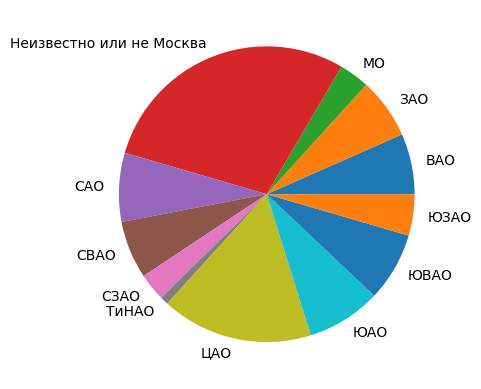

In [99]:
# Строим pie chart по округам

x = metro_counts["count"]
y = metro_counts["Округ"]

fig_metro, ax_metro = plt.subplots()
ax_metro.pie(for_pie["count"], labels=for_pie.index)
fig_metro.savefig('РАспределение по округам.svg', dpi=300, bbox_inches="tight")
;

In [35]:
# Строим гистограмму распределения цены аренды
# Шаг 1. Достаем из датасета цену
prices = df["Цена"].copy()


def get_price(string):
    if isinstance(string, str):
        str_list = string.split()
        return int(round(float(str_list[0]))) // 1000
    else:
        return string


prices_int = prices.map(get_price)
# prices_int

''

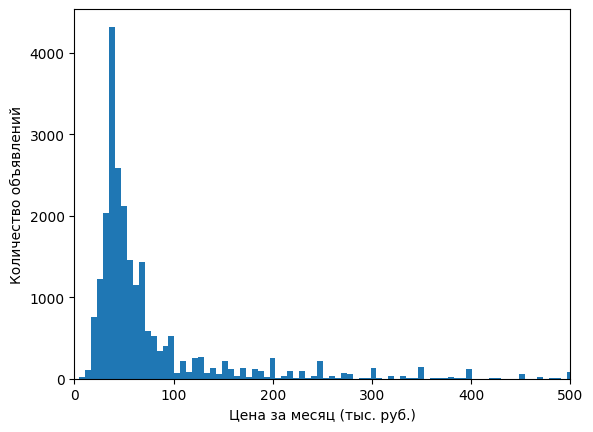

In [ ]:
# Шаг 2. Строим распределение
fig_pr, ax_pr = plt.subplots()

ax_pr.hist(prices_int, bins=500)
ax_pr.set_xlabel('Цена за месяц (тыс. руб.)')
ax_pr.set_ylabel('Количество объявлений')
ax_pr.set_xlim((0, 500))
fig_pr.savefig('Распределение цены.svg', dpi=300, bbox_inches="tight")
;

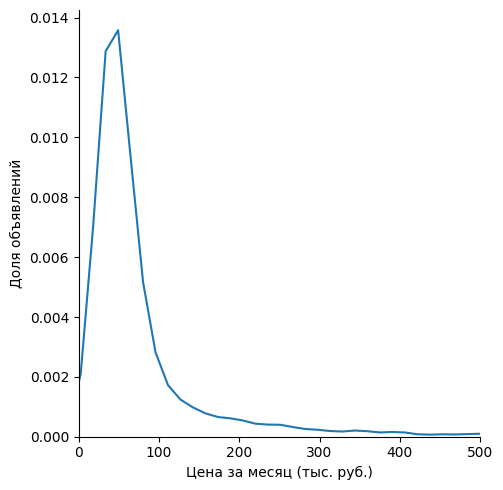

In [48]:
# Вариант 2. Гладкое распределение (seaborn)

fig_pr_2 = sns.displot(prices_int, kind="kde")
plt.xlim((0, 500))
plt.xlabel("Цена за месяц (тыс. руб.)")
plt.ylabel("Доля объявлений")
fig_pr_2.savefig("Распределение цены_2.svg", dpi=300, bbox_inches="tight")

In [58]:
# Строим гистограмму распределения площади квартир
# Шаг 1. Достаем из датасета площадь
area = df["Площадь, м2"].copy()


def get_area(string):
    if isinstance(string, str):
        total_area_str = string[: string.find("/")]
        return round(float(total_area_str), 1)
    else:
        return string


area_int = area.map(get_area)
area_int

0        200.0
1        198.0
2        200.0
3        170.0
4         58.0
         ...  
23363     35.0
23364     38.7
23365     43.0
23366     52.5
23367     90.0
Name: Площадь, м2, Length: 23368, dtype: float64

''

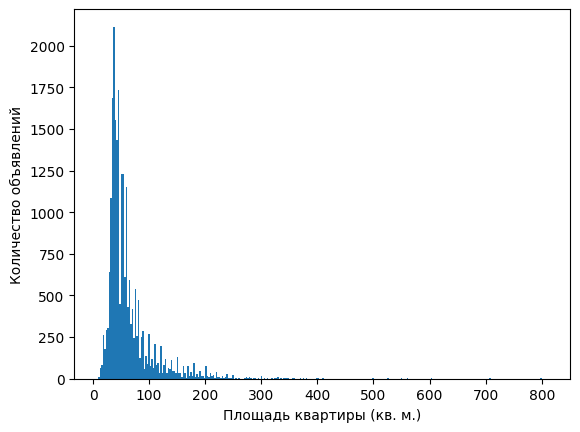

In [67]:
# Шаг 2. Строим распределение
fig_ar, ax_ar = plt.subplots()

ax_ar.hist(area_int, bins=300)
ax_ar.set_xlabel('Площадь квартиры (кв. м.)')
ax_ar.set_ylabel('Количество объявлений')
fig_ar.savefig('Распределение площади.svg', dpi=300, bbox_inches="tight")
;

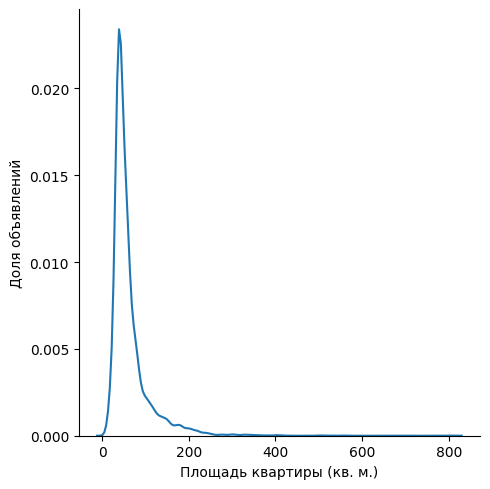

In [66]:
# Вариант 2. Гладкое распределение (seaborn)

fig_ar_2 = sns.displot(area_int, kind="kde")
plt.xlabel("Площадь квартиры (кв. м.)")
plt.ylabel("Доля объявлений")
fig_ar_2.savefig("Распределение площади_2.svg", dpi=300, bbox_inches="tight")